# Review Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

FIG_SIZE = (15,6)
DO_WRITE_CHARTS = True

In [4]:
fname = '../clean_data/_analysis/us_restaurant_bids.txt'

with open(fname) as f:
    us_rest_bids = f.readlines()
us_rest_bids = [x.strip() for x in us_rest_bids] 

# Load Review Data for US Restaurants

In [5]:
time_marker(text='Loading Review Data...')

reviews = pd.DataFrame()
file_path_slug = '../clean_data/reviews/*.csv'
file_list = glob(file_path_slug)

# Chunk Settings
chunks = list()
chunksize = 10000
for ii, file in enumerate(sorted(file_list)):
    time_marker('Reading {} of {} {}...'.format(ii+1, len(file_list), file))
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)
    format_width = len(str(num_chunks))

    # import file in chunks
    for jj, chunk in enumerate(pd.read_csv(file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['date'])):

        # only consider reviews for businesses that are US Restaurants
        chunk = chunk[chunk.business_id.isin(us_rest_bids)].copy()
        
        # drop reviews with missing review text
        chunk = chunk[(~chunk.text.isnull()) & (~chunk.user_id.isnull())].copy()
        
        # append chunk to chunks list
        chunks.append(chunk)
        
time_marker(text='merging to dataframe...')
reviews = pd.concat(chunks)

time_marker('reseting index...')
reviews.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')


[22:59:26.160099] Loading Review Data...
[22:59:26.163920] Reading 1 of 64 ../clean_data/reviews/00_-_reviews_clean.csv...
[22:59:28.178626] Reading 2 of 64 ../clean_data/reviews/01_0_reviews_clean.csv...
[22:59:29.738083] Reading 3 of 64 ../clean_data/reviews/02_1_reviews_clean.csv...
[22:59:31.096104] Reading 4 of 64 ../clean_data/reviews/03_2_reviews_clean.csv...
[22:59:32.397851] Reading 5 of 64 ../clean_data/reviews/04_3_reviews_clean.csv...
[22:59:33.997414] Reading 6 of 64 ../clean_data/reviews/05_4_reviews_clean.csv...
[22:59:35.409999] Reading 7 of 64 ../clean_data/reviews/06_5_reviews_clean.csv...
[22:59:36.948770] Reading 8 of 64 ../clean_data/reviews/07_6_reviews_clean.csv...
[22:59:38.348420] Reading 9 of 64 ../clean_data/reviews/08_7_reviews_clean.csv...
[22:59:39.753879] Reading 10 of 64 ../clean_data/reviews/09_8_reviews_clean.csv...
[22:59:41.061230] Reading 11 of 64 ../clean_data/reviews/10_9_reviews_clean.csv...
[22:59:42.376485] Reading 12 of 64 ../clean_data/review

In [6]:
reviews['date'] = pd.to_datetime(reviews['date'])

reviews['cool']             = reviews['cool'].astype(int)
reviews['funny']            = reviews['funny'].astype(int)
reviews['stars']            = reviews['stars'].astype(int)

reviews['useful'].fillna(0, inplace=True)
reviews['useful']           = reviews['useful'].astype(int)

reviews['review_length']    = reviews['review_length'].astype(int)

In [7]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_length
0,-gTX7XKGOntF2FQ1EDxHpA,0,2016-07-21,0,8BJUlXtGvVpkNq663suBUw,1,went thru the drive thru and could hardly unde...,0,AKtCpeBdst-OFYNmsfJgiw,336
1,-gTX7XKGOntF2FQ1EDxHpA,1,2017-07-25,0,umGwYIfHbKjj5Tvi2o4Oog,1,everytime i come here something is wrong a few...,1,5vTqiawndUhSPAqDMhPr5Q,293
2,-gTX7XKGOntF2FQ1EDxHpA,1,2015-10-18,1,mjiQ2bNWFTbuzdQN0IVcJw,1,bad decision extra crispy was not rollsbiscui...,3,7-nbzoSmoMzwo2fbetoycQ,228
3,-gTX7XKGOntF2FQ1EDxHpA,0,2017-03-15,0,pH-8G3AXXqQ6FyTAMEYRmQ,1,walked in staff chateering since there was no ...,0,zy96ykN5Djp8-HoXTBtzJg,378
4,-luHD_D1L22l0rYvNWyWFQ,0,2014-12-19,0,IUENqKWGxon41TpqKq1DXw,5,the eggplant parmesan is fabulous my friend ...,0,DmUSvFMmj0ja8iz7xgPeqQ,191


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323672 entries, 0 to 1323671
Data columns (total 10 columns):
business_id      1323672 non-null object
cool             1323672 non-null int64
date             1323672 non-null datetime64[ns]
funny            1323672 non-null int64
review_id        1323672 non-null object
stars            1323672 non-null int64
text             1323672 non-null object
useful           1323672 non-null int64
user_id          1323672 non-null object
review_length    1323672 non-null int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 101.0+ MB


In [9]:
for col in reviews.columns:
    print('{} unique {} values'.format(str(len(reviews[col].unique())).rjust(10), col.ljust(15)))

     19976 unique business_id     values
       118 unique cool            values
      4305 unique date            values
       102 unique funny           values
   1323672 unique review_id       values
         5 unique stars           values
   1323232 unique text            values
       127 unique useful          values
    496209 unique user_id         values
      4819 unique review_length   values


# Exploratory Data Analysis

<div class="span5 alert alert-info">
<b>Exporation:</b> Distribution of Star Ratings
</div>

<div class="alert alert-success">
<b>Take Away:</b> There are a lot of 4 and 5 Star reviews, and a second peak on 1 Star reviews.  This might indicate that users tend to review when things are notably good, or notably bad
</div>

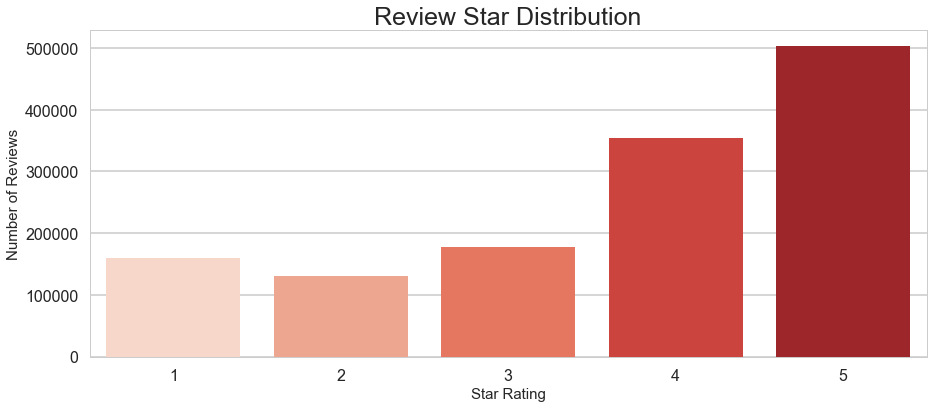

In [10]:
ax = plt.figure(figsize=FIG_SIZE)
ax = sns.countplot(x='stars', data=reviews, palette='Reds')

ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_ylabel('Number of Reviews', size=LABEL_FONT_SIZE)

title = 'Review Star Distribution'
ax.set_title(title, size=TITLE_FONT_SIZE)

if DO_WRITE_CHARTS:
    plt.savefig('../charts/{}.png'.format(title.lower().replace(' ', '_')))
else:
    plt.show()
    plt.close()

<div class="span5 alert alert-info">
<b>Exporation:</b> Review Text Length by Star Rating
</div>

<div class="alert alert-success">
<b>Take Away:</b> Review Text length is highly variable with some extreme high end outliers, thus the chart below is cropped to only display reviews with up to 2000 characters.  Review Lengths are longest and have the widest spread for 2 Star reviews, while 4 and 5 Star Reviews have the shortest review lengths.
</div>

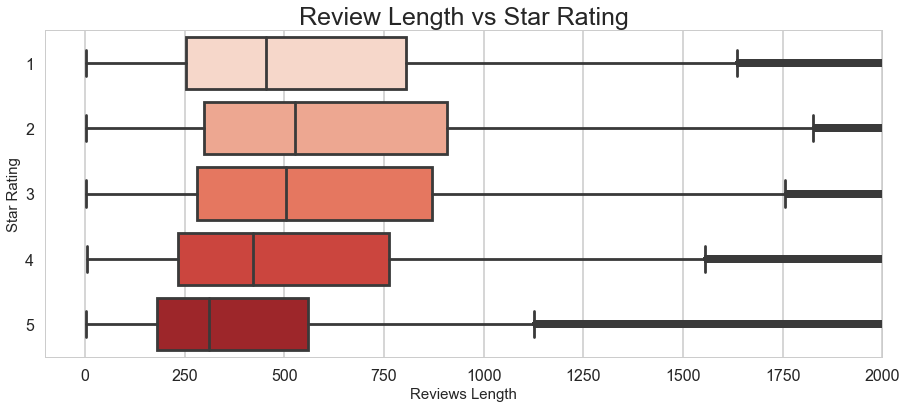

In [11]:
ax = plt.figure(figsize=FIG_SIZE)
# ax = sns.boxplot(x='stars', y='review_length', data=reviews, palette='Reds')
ax = sns.boxplot(x='review_length', y='stars', data=reviews, palette='Reds', orient='h')

ax.set_ylabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xlabel('Reviews Length', size=LABEL_FONT_SIZE)

title = 'Review Length vs Star Rating'
ax.set_title(title, size=TITLE_FONT_SIZE)

ax.set_xlim([-100,2000])

if DO_WRITE_CHARTS:
    plt.savefig('../charts/{}.png'.format(title.lower().replace(' ', '_')))
else:
    plt.show()
    plt.close()

In [12]:
print('Total number of reviews\t\t\t{:d}'.format(reviews.shape[0]))
print('Number of reviews tagged as \'cool\'\t {:d}\t{:2.4f}'.format(reviews[reviews.cool > 0].shape[0], (reviews[reviews.cool > 0].shape[0]/reviews.shape[0]*100.)))
print('Number of reviews tagged as \'funny\'\t {:d}\t{:2.4f}'.format(reviews[reviews.funny > 0].shape[0], (reviews[reviews.funny > 0].shape[0]/reviews.shape[0]*100.)))
print('Number of reviews tagged as \'useful\'\t {:d}\t{:2.4f}'.format(reviews[reviews.useful > 0].shape[0], (reviews[reviews.useful > 0].shape[0]/reviews.shape[0]*100.)))

Total number of reviews			1323672
Number of reviews tagged as 'cool'	 309855	23.4087
Number of reviews tagged as 'funny'	 248310	18.7592
Number of reviews tagged as 'useful'	 526026	39.7399


# Limit to only Restaurants in Top Categories

<div class="span5 alert alert-info">
<p><b>Exporation:</b> Parsing Restaurant Data, we can extract the most Common Categories and associated `business_id`s</p>
<p>Lets investigate Star Ratings and REview Length Distributions of ths subset of reviews</p>
</div>

<div class="alert alert-success">
<b>Take Away:</b> Key take away is that the trends are stable within this subset of reviews, this is likely due to the simple fact that given these categories are the most common restaurant types, they are going to account for the majority of reviews.
</div>

In [13]:
fname = '../clean_data/_analysis/us_restaurant_bids_alt.txt'

with open(fname) as f:
    top_cat_us_rest_bids = f.readlines()
top_cat_us_rest_bids = [x.strip() for x in top_cat_us_rest_bids] 

In [14]:
top_cat_reviews = reviews[reviews.business_id.isin(top_cat_us_rest_bids)].copy()

In [15]:
top_cat_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917881 entries, 0 to 1323671
Data columns (total 10 columns):
business_id      917881 non-null object
cool             917881 non-null int64
date             917881 non-null datetime64[ns]
funny            917881 non-null int64
review_id        917881 non-null object
stars            917881 non-null int64
text             917881 non-null object
useful           917881 non-null int64
user_id          917881 non-null object
review_length    917881 non-null int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 77.0+ MB


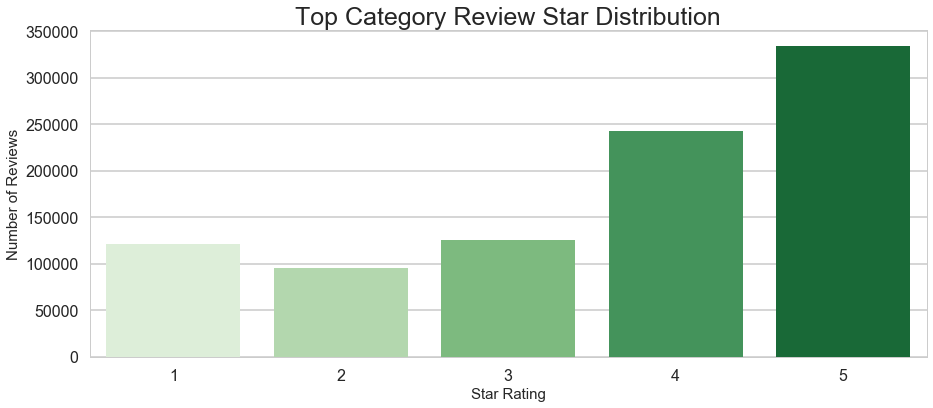

In [16]:
ax = plt.figure(figsize=FIG_SIZE)
ax = sns.countplot(x='stars', data=top_cat_reviews, palette='Greens')

ax.set_xlabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_ylabel('Number of Reviews', size=LABEL_FONT_SIZE)

title = 'Top Category Review Star Distribution'
ax.set_title(title, size=TITLE_FONT_SIZE)

if DO_WRITE_CHARTS:
    plt.savefig('../charts/{}.png'.format(title.lower().replace(' ', '_')))
else:
    plt.show()
    plt.close()

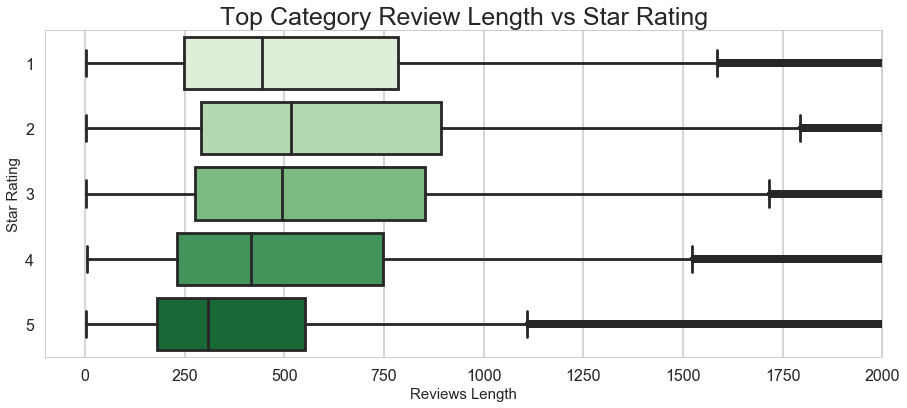

In [17]:
ax = plt.figure(figsize=FIG_SIZE)
ax = sns.boxplot(x='review_length', y='stars', data=top_cat_reviews, palette='Greens', orient='h')

ax.set_ylabel('Star Rating', size=LABEL_FONT_SIZE)
ax.set_xlabel('Reviews Length', size=LABEL_FONT_SIZE)

title = 'Top Category Review Length vs Star Rating'
ax.set_title(title, size=TITLE_FONT_SIZE)

ax.set_xlim([-100,2000])

if DO_WRITE_CHARTS:
    plt.savefig('../charts/{}.png'.format(title.lower().replace(' ', '_')))
else:
    plt.show()
    plt.close()